CryptoCompare
API Documentation

[API Doc](https://min-api.cryptocompare.com/documentation)

In [12]:
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
### Using Python and Get Requests to retrieve data from the CryptoCompare API. ###

In [50]:
# get a live coin price

def price(symbol, comparison_symbols=['USD'], exchange=''): # can specific currency comparison_symbols='AUD'
    url = 'https://min-api.cryptocompare.com/data/price?fsym={}&tsyms={}'\
            .format(symbol.upper(), ','.join(comparison_symbols).upper())
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()
    return data

price('ETH') # can specify an exchange='Coinbase'

{'USD': 2650.41}

In [51]:
# get the historical price of a coin

def daily_price_historical(symbol, comparison_symbol, limit=1, aggregate=1, exchange='', allData='true'):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}&allData={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate, allData)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

df = daily_price_historical('ETH', 'USD') # select the coin, currency, exchange
print('Max length = %s' % len(df))
print('Max time = %s' % (df.timestamp.max() - df.timestamp.min()))
df.head()

Max length = 5144
Max time = 5143 days 00:00:00


,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,timestamp
0,1279324800,0.0,0.0,0.0,0.0,0.0,0.0,direct,,2010-07-17
1,1279411200,0.0,0.0,0.0,0.0,0.0,0.0,direct,,2010-07-18
2,1279497600,0.0,0.0,0.0,0.0,0.0,0.0,direct,,2010-07-19
3,1279584000,0.0,0.0,0.0,0.0,0.0,0.0,direct,,2010-07-20
4,1279670400,0.0,0.0,0.0,0.0,0.0,0.0,direct,,2010-07-21


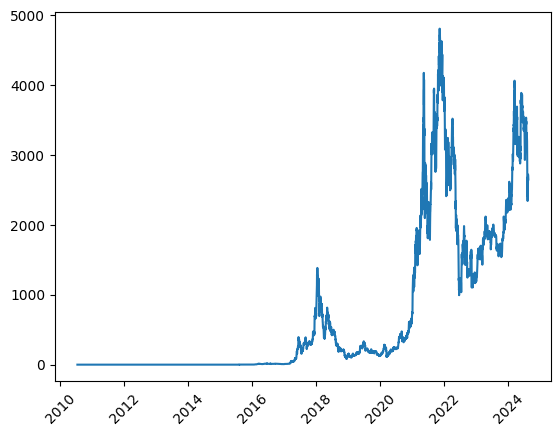

In [52]:
# display the coins historical data

plt.plot(df.timestamp, df.close)
plt.xticks(rotation=45)
plt.show()

In [53]:
# get a full coin list from CryptoCompare

def coin_list():
    url = 'https://www.cryptocompare.com/api/data/coinlist/'
    page = requests.get(url)
    data = page.json()['Data']
    return data

    print(data)

In [48]:
# get  the coin list with ID map

data = coin_list()
print(len(data))
symbol_id_dict = {symb: int(d['Id']) for symb, d in data.items()}
print(json.dumps(symbol_id_dict, indent=2))

14562
{
  "HPC": 62659,
  "TBIS": 354771,
  "TWT": 934995,
  "BTC": 1182,
  "ETH": 7605,
  "LTC": 3808,
  "DASH": 3807,
  "XMR": 5038,
  "NXT": 1183,
  "ETC": 5324,
  "DOGE": 4432,
  "ZEC": 24854,
  "BTS": 5039,
  "DGB": 4430,
  "XRP": 5031,
  "BTCD": 4400,
  "PPC": 2349,
  "CRAIG": 4425,
  "XBS": 5023,
  "XPY": 5030,
  "PRC": 3638,
  "YBC": 3639,
  "DANK": 3640,
  "GIVE": 3641,
  "KOBO": 3642,
  "DT": 3643,
  "CETI": 3644,
  "SUP": 3645,
  "XPD": 3646,
  "GEO": 3647,
  "CHASH": 3648,
  "NXTI": 3650,
  "INSANITY": 3653,
  "XDP": 3655,
  "2015": 3744,
  "42": 4321,
  "AC": 4322,
  "ACOIN": 4323,
  "AEROCOIN": 4324,
  "ALF": 4325,
  "AEGIS": 4326,
  "AMERICANCOIN": 4327,
  "ALIEN": 4328,
  "APEXCOIN": 4330,
  "ARCHCOIN": 4331,
  "ARGENTUM": 4371,
  "ARI": 4332,
  "AURORAC": 4333,
  "AXR": 4334,
  "BETACOIN": 4337,
  "BITB": 4338,
  "BLU": 4340,
  "BLK": 4339,
  "BOST": 4342,
  "BQC": 4343,
  "XMY": 4345,
  "MOONC": 4346,
  "ZET": 4347,
  "SXC": 4348,
  "QTL": 4349,
  "ENRG": 4350,
  "QRK

In [46]:
# get the full snapshot info of a coin using the ID map

def coin_snapshot_full_by_id(symbol, symbol_id_dict={}):
    if not symbol_id_dict:
        symbol_id_dict = { # set up the known ID map
            'BTC': 1182,
            'ETH': 7605,
            'LTC': 3808
        }
    symbol_id = symbol_id_dict[symbol.upper()]
    url = 'https://www.cryptocompare.com/api/data/coinsnapshotfullbyid/?id={}'\
            .format(symbol_id)
    page = requests.get(url)
    data = page.json()['Data']
    return data
data = coin_snapshot_full_by_id('ETH', symbol_id_dict) # choose the coin
data

{'SEO': {'BaseUrl': 'https://www.cryptocompare.com',
  'BaseImageUrl': 'https://www.cryptocompare.com',
  'OgImageWidth': '300',
  'OgImageHeight': '300',
  'PageTitle': 'Ethereum (ETH) - Live Ethereum price and market cap',
  'PageDescription': 'Live Ethereum price movements from all markets and ETH market cap, use our charts and see when there is an opportunity to buy or sell.',
  'OgImageUrl': 'https://resources.cryptocompare.com/asset-management/2/1659946678476.png'},
 'General': {'Id': '7605',
  'DocumentType': 'Webpagecoinp',
  'Symbol': 'ETH',
  'Url': '/coins/eth/',
  'BaseAngularUrl': '/coins/eth/',
  'TotalCoinSupply': -1,
  'StartDate': '2015-07-30',
  'BlockNumber': 20531263,
  'NetHashesPerSecond': 0,
  'BlockReward': 2.2553732867354905,
  'TotalCoinsMined': 120277045.254502,
  'SupplyCirculating': 120277045.254502,
  'BlockTime': 12,
  'MktCapPenalty': 0,
  'PlatformType': {'Value': 'Blockchain',
   'Description': 'The asset class/type'},
  'WhitePaperUrl': 'https://resou

In [47]:
# get social information for the coin

def live_social_status(symbol, symbol_id_dict={}):
    if not symbol_id_dict:
        symbol_id_dict = { # set up the known ID map
            'BTC': 1182,
            'ETH': 7605,
            'LTC': 3808
        }
    symbol_id = symbol_id_dict[symbol.upper()]
    url = 'https://www.cryptocompare.com/api/data/socialstats/?id={}'\
            .format(symbol_id)
    page = requests.get(url)
    data = page.json()['Data']
    return data

data = live_social_status('ETH', symbol_id_dict) # choose the coin
data

{'General': {'Name': 'ETH',
  'CoinName': 'Ethereum',
  'Type': 'Webpagecoinp',
  'Points': 7410069},
 'CryptoCompare': {'SimilarItems': [{'Id': 1182,
    'Name': 'Bitcoin',
    'FullName': 'Bitcoin (BTC)',
    'ImageUrl': '/media/37746251/btc.png',
    'Url': '/coins/btc/',
    'FollowingType': 1},
   {'Id': 5031,
    'Name': 'XRP',
    'FullName': 'XRP (XRP)',
    'ImageUrl': '/media/38553096/xrp.png',
    'Url': '/coins/xrp/',
    'FollowingType': 1},
   {'Id': 937720,
    'Name': 'r/CryptoCurrency Moons',
    'FullName': 'r/CryptoCurrency Moons (MOON)',
    'ImageUrl': '/media/40484936/moon.png',
    'Url': '/coins/moon/',
    'FollowingType': 1},
   {'Id': 4432,
    'Name': 'Dogecoin',
    'FullName': 'Dogecoin (DOGE)',
    'ImageUrl': '/media/37746339/doge.png',
    'Url': '/coins/doge/',
    'FollowingType': 1},
   {'Id': 3808,
    'Name': 'Litecoin',
    'FullName': 'Litecoin (LTC)',
    'ImageUrl': '/media/37746243/ltc.png',
    'Url': '/coins/ltc/',
    'FollowingType': 1},
 